# Neighbour-Joining (NJ) and Neighbour-Net phylogenies of _Littorina sp._

In [1]:
## Add paths
.libPaths("/nfs/scistore18/bartogrp/apal/R/x86_64-pc-linux-gnu-library/4.3")

## Load packages
library("ape")
library("phangorn")
library("tictoc")
library("parallel")

## Set wrodking directory
setwd("~/Littorina/phylogeny")

In [2]:
## No. of parallel cores
detectCores()

[1] 56

In [3]:
## Read PHYLIP file
tic()
littorina <- read.phyDat("variants_only_108_VCF_MAC2_minQ30_maxmiss1.0.recode.min4.phy", format = "phylip", type = "dna")
toc()
str(littorina)

289.766 sec elapsed
List of 107
 $ 83_AB1_Lsb                  : int [1:2569425] 3 3 1 3 3 2 10 2 2 2 ...
 $ 88_AB1_Lsb                  : int [1:2569425] 3 3 1 3 3 2 2 2 2 2 ...
 $ ACF_1                       : int [1:2569425] 3 3 1 3 3 2 2 2 2 10 ...
 $ ACF_2                       : int [1:2569425] 3 3 1 3 3 2 2 2 2 2 ...
 $ ACF_4                       : int [1:2569425] 3 3 1 3 3 2 2 2 2 2 ...
 $ AMB_5_3                     : int [1:2569425] 3 3 1 3 3 2 2 2 2 2 ...
 $ BH_10_1                     : int [1:2569425] 3 3 1 3 3 2 2 2 2 2 ...
 $ BH_8_2                      : int [1:2569425] 3 3 1 3 3 10 2 2 2 2 ...
 $ BUR_Lsax_F                  : int [1:2569425] 3 3 1 3 3 2 2 2 2 2 ...
 $ BUR_Lsax_M                  : int [1:2569425] 3 3 1 3 3 2 2 2 2 2 ...
 $ CEA_Larc_F_1                : int [1:2569425] 3 3 1 3 3 2 2 2 2 2 ...
 $ CEA_Larc_F_2                : int [1:2569425] 3 3 1 3 3 2 10 2 2 2 ...
 $ CEA_Lsax_F_1                : int [1:2569425] 3 11 1 3 3 2 10 2 2 2 ...
 $ CZA005_Ls 

In [4]:
## Read sample info
samples <- read.table("samples.txt", header = F)
colnames(samples) <- c("ID", "population", "colour")
#samples[match(nnet_littorina$tip.label, samples$ID),] ## to match the row order

<hr>

## Neighbour-Joining Tree

69.094 sec elapsed


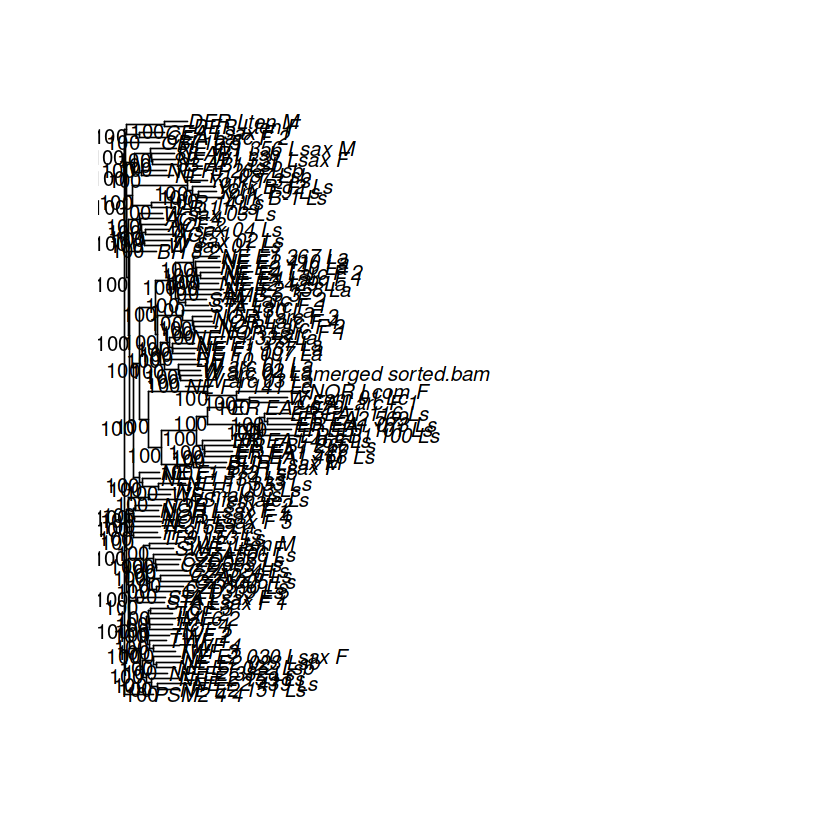

In [5]:
## Construct distance matrix
dm_littorina <- dist.ml(littorina, model = "JC69")

## Neighbour-Joining tree with bootstrapping
tic()
treeNJ <- NJ(dm_littorina)
bootstrap_NJ <- bootstrap.phyDat(littorina, 
                                 FUN = function(x){NJ(dm_littorina)}, 
                                 bs = 100)
toc()

treeNJ <- plotBS(treeNJ, bootstrap_NJ, "phylogram")

In [6]:
str(treeNJ)

List of 5
 $ edge       : int [1:211, 1:2] 186 186 153 153 117 117 162 162 161 161 ...
 $ edge.length: num [1:211] 0.00736 0.00598 0.00675 0.00644 0.00333 ...
 $ tip.label  : chr [1:107] "83_AB1_Lsb" "88_AB1_Lsb" "ACF_1" "ACF_2" ...
 $ Nnode      : int 105
 $ node.label : num [1:105] 100 100 100 100 100 100 100 100 100 100 ...
 - attr(*, "class")= chr "phylo"
 - attr(*, "order")= chr "postorder"


In [10]:
## Write and save tree
write.tree(treeNJ, "treeNJ_littorina.tree")

In [38]:
# ## Root NJ-tree using compressa samples
# treeNJ <- root(treeNJ, c("NOR_Lcom_F", "W_com_01_Lc", "NE_F1_141_Lc", "CEA_Larc_F_1"))

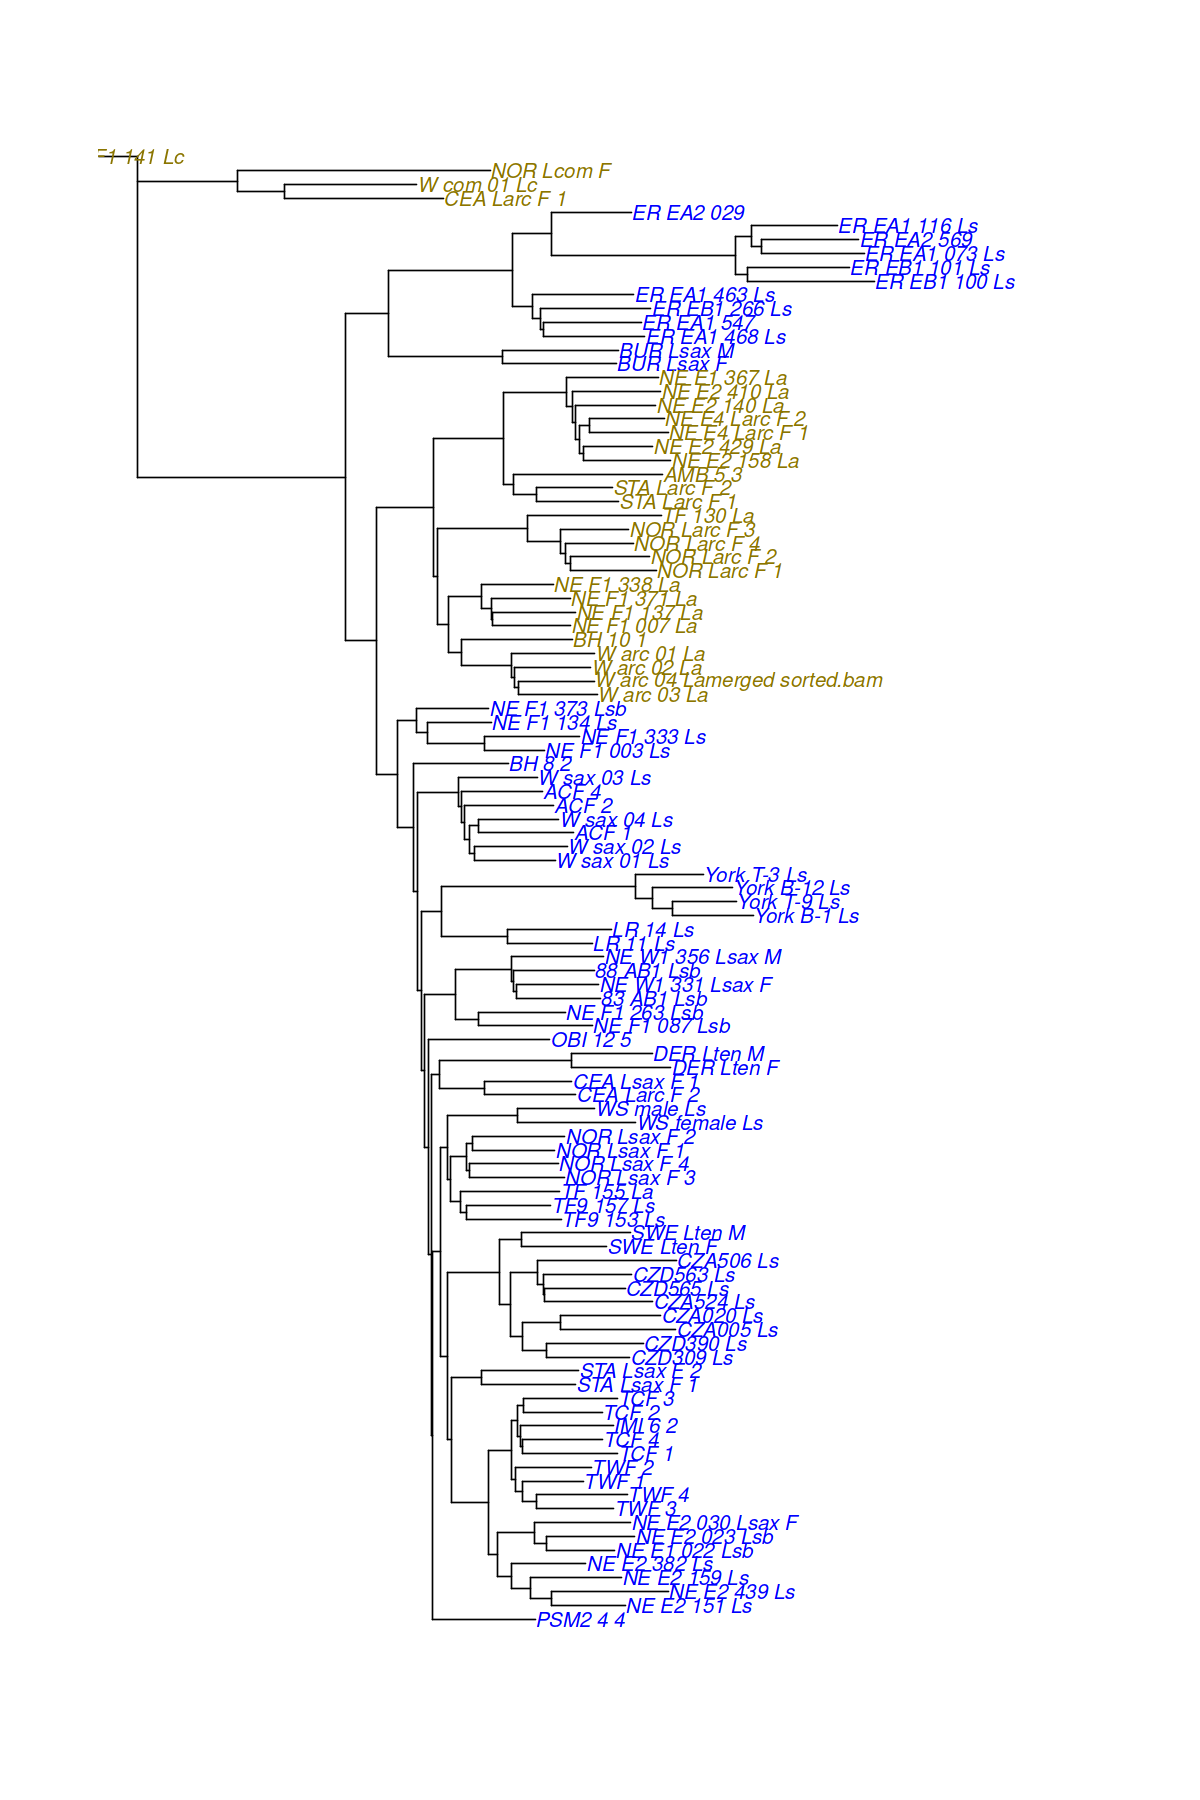

In [21]:
## Plot NJ tree
options(repr.plot.width=10, repr.plot.height=15)
treeNJ.tip.colour <- samples[match(treeNJ$tip.label, samples$ID),]$colour
#par()
plot(root(treeNJ, c("NOR_Lcom_F", "W_com_01_Lc", "NE_F1_141_Lc", "CEA_Larc_F_1")), tip.color = treeNJ.tip.colour, cex = 1)

<hr>

## Neighbour-Net network

In [8]:
tic()
nNet <- neighborNet(dm_littorina)
toc()

529.075 sec elapsed


In [9]:
str(nNet)

List of 6
 $ edge       : int [1:3910, 1:2] 108 108 108 108 108 109 109 109 109 110 ...
 $ tip.label  : chr [1:107] "NE_W1_356_Lsax_M" "88_AB1_Lsb" "NE_W1_331_Lsax_F" "83_AB1_Lsb" ...
 $ Nnode      : int 2038
 $ splitIndex : int [1:3910] 378 377 376 363 246 376 374 336 246 376 ...
 $ edge.length: num [1:3910] 4.98e-05 2.19e-04 6.61e-05 9.50e-05 1.45e-03 ...
 $ splits     :List of 378
  ..$ : int 1
  ..$ : int 2
  ..$ : int 3
  ..$ : int 4
  ..$ : int 5
  ..$ : int 6
  ..$ : int 7
  ..$ : int 8
  ..$ : int 9
  ..$ : int 10
  ..$ : int 11
  ..$ : int 12
  ..$ : int 13
  ..$ : int 14
  ..$ : int 15
  ..$ : int 16
  ..$ : int 17
  ..$ : int 18
  ..$ : int 19
  ..$ : int 20
  ..$ : int 21
  ..$ : int 22
  ..$ : int 23
  ..$ : int 24
  ..$ : int 25
  ..$ : int 26
  ..$ : int 27
  ..$ : int 28
  ..$ : int 29
  ..$ : int 30
  ..$ : int 31
  ..$ : int 32
  ..$ : int 33
  ..$ : int 34
  ..$ : int 35
  ..$ : int 36
  ..$ : int 37
  ..$ : int 38
  ..$ : int 39
  ..$ : int 40
  ..$ : int 41
  ..$ :

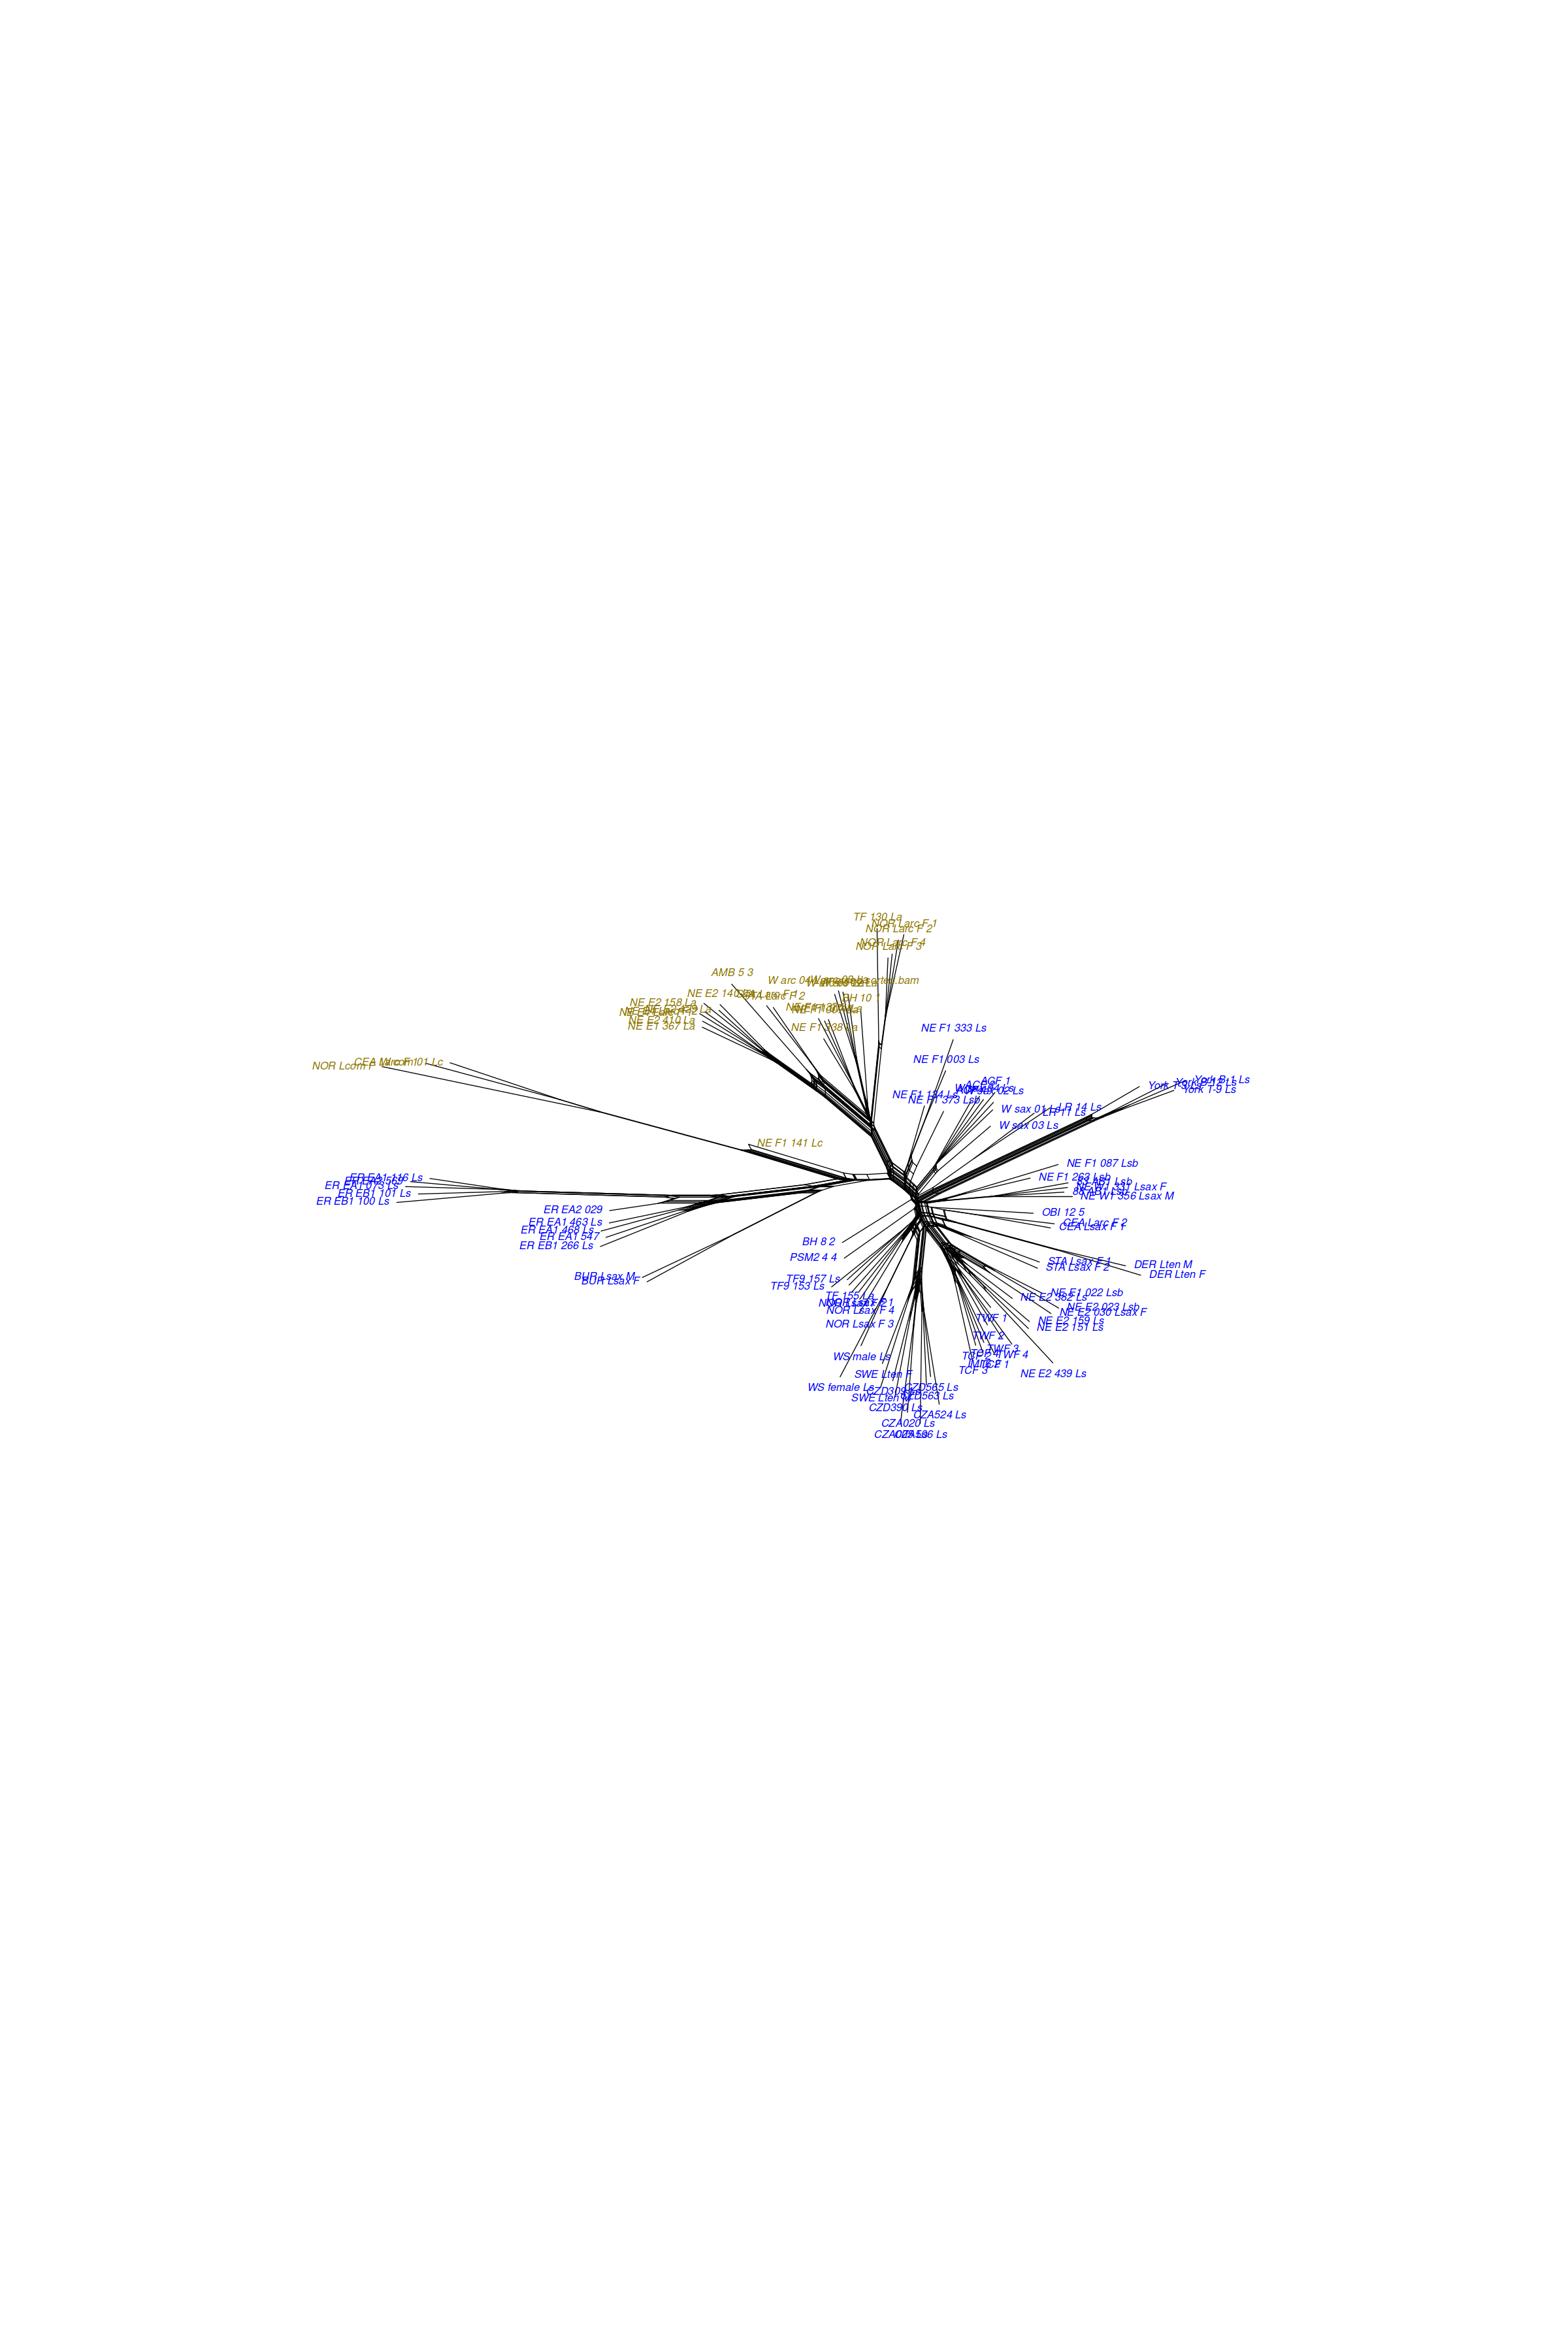

In [35]:
options(repr.plot.width=20, repr.plot.height=30)
nNet.tip.colour <- samples[match(nNet$tip.label, samples$ID),]$colour
par(mar = c(0,0,0,0))
plot(nNet, cex = 0.8, edge.width = 0.8, use.edge.length = T, tip.color = nNet.tip.colour, no.margin = TRUE)

In [36]:
## Add branch support values from the NJ tree onto neighbourNet network
nNet_conf <- addConfidences(nNet, treeNJ)

In [37]:
## Write neighbourNet network
write.nexus.networx(nNet_conf, file = "nNet_littorina.nex", taxa = TRUE, splits = TRUE, append = FALSE)

<br/>
<hr style="border: 1px double; color: black">

In [38]:
sessionInfo()

R version 4.3.0 (2023-04-21)
Platform: x86_64-pc-linux-gnu (64-bit)
Running under: Debian GNU/Linux 11 (bullseye)

Matrix products: default
BLAS:   /nfs/scistore07/clustersw/debian/bullseye/R/4.3.0/lib/R/lib/libRblas.so 
LAPACK: /nfs/scistore07/clustersw/debian/bullseye/R/4.3.0/lib/R/lib/libRlapack.so;  LAPACK version 3.11.0

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

time zone: Europe/Vienna
tzcode source: system (glibc)

attached base packages:
[1] parallel  stats     graphics  grDevices utils     datasets  methods  
[8] base     

other attached packages:
[1] tictoc_1.2      phangorn_2.11.1 ape_5.7-1      

loaded via a namespace (and not attached):
 [1] Matrix_1.5-4  